# Predicting objects from cifar10 Dataset

### Importing dataset from Tensorflow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset = tfds.load('cifar10')
train, test = dataset['train'], dataset['test']

train_numpy = np.vstack(tfds.as_numpy(train))
test_numpy = np.vstack(tfds.as_numpy(test))

X_train = np.array(list(map(lambda x: x[0]['image'], train_numpy)))
y_train = np.array(list(map(lambda x: x[0]['label'], train_numpy)))

X_test = np.array(list(map(lambda x: x[0]['image'], test_numpy)))
y_test = np.array(list(map(lambda x: x[0]['label'], test_numpy)))

/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


### Performing Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
	rescale=1/255
)
validation_datagen = ImageDataGenerator(
	rescale=1/255
)


In [ ]:
train_generator= train_datagen.flow(
        X_train,
        y_train, 
        batch_size=200)

validation_generator = validation_datagen.flow(
        X_train,
        y_train, 
        batch_size=100)



In [5]:
from tensorflow.keras.layers import *

### Creating Model

In [21]:
Conv2D?

In [33]:
model=tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 6, 6, 32)          18464     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)             

In [35]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])


In [36]:
history=model.fit_generator(
	train_generator,
	steps_per_epoch=50,
	epochs=100,
	validation_data=validation_generator,
	validation_steps=40
	)


Epoch 1/100
50/50 [==============================] - 10s 208ms/step - loss: 2.1542 - accuracy: 0.1872 - val_loss: 2.0251 - val_accuracy: 0.2845
Epoch 2/100
50/50 [==============================] - 11s 224ms/step - loss: 1.8669 - accuracy: 0.3170 - val_loss: 1.9080 - val_accuracy: 0.2965
Epoch 3/100
50/50 [==============================] - 10s 202ms/step - loss: 1.7713 - accuracy: 0.3646 - val_loss: 1.6443 - val_accuracy: 0.3935
Epoch 4/100
50/50 [==============================] - 10s 205ms/step - loss: 1.6597 - accuracy: 0.3900 - val_loss: 1.6319 - val_accuracy: 0.3975
Epoch 5/100
50/50 [==============================] - 10s 204ms/step - loss: 1.5862 - accuracy: 0.4222 - val_loss: 1.5259 - val_accuracy: 0.4280
Epoch 6/100
50/50 [==============================] - 11s 217ms/step - loss: 1.5488 - accuracy: 0.4308 - val_loss: 1.4828 - val_accuracy: 0.4395
Epoch 7/100
50/50 [==============================] - 11s 217ms/step - loss: 1.4747 - accuracy: 0.4662 - val_loss: 1.4333 - val_accuracy:

50/50 [==============================] - 11s 218ms/step - loss: 0.7445 - accuracy: 0.7410 - val_loss: 0.7249 - val_accuracy: 0.7425
Epoch 58/100
50/50 [==============================] - 19s 374ms/step - loss: 0.7406 - accuracy: 0.7400 - val_loss: 0.7224 - val_accuracy: 0.7425
Epoch 59/100
50/50 [==============================] - 11s 230ms/step - loss: 0.7601 - accuracy: 0.7402 - val_loss: 0.7603 - val_accuracy: 0.7325
Epoch 60/100
50/50 [==============================] - 10s 206ms/step - loss: 0.7347 - accuracy: 0.7412 - val_loss: 0.6978 - val_accuracy: 0.7580
Epoch 61/100
50/50 [==============================] - 11s 225ms/step - loss: 0.7221 - accuracy: 0.7458 - val_loss: 0.6749 - val_accuracy: 0.7635
Epoch 62/100
50/50 [==============================] - 11s 226ms/step - loss: 0.6989 - accuracy: 0.7568 - val_loss: 0.6830 - val_accuracy: 0.7585
Epoch 63/100
50/50 [==============================] - 10s 206ms/step - loss: 0.7163 - accuracy: 0.7468 - val_loss: 0.7781 - val_accuracy: 0.733

### Model has been trained. Some examples below

In [37]:
import matplotlib.pyplot as plt

In [38]:
p=[np.random.randint(10000) for q in range(11)]

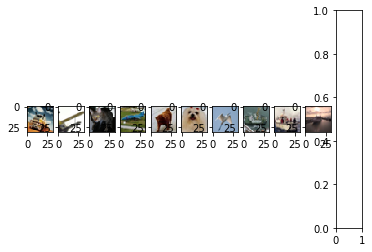

In [43]:
# Displaying 10 random handwritten images in the test dataset

j=0
for i in p: 
    j+=1
    plt.imshow(X_test[i].reshape([32, 32, 3]));
    plt.subplot(1, 11, j)
plt.show()

In [44]:
# Actual values of the data in the test dataset

values=[]
for i in p[1:]:
    values.append(y_test[i])
print(values)

[9, 0, 3, 0, 5, 5, 2, 8, 8, 8]


In [45]:
# Predictions performed by the trained model

predictions=[]
for i in p[1:]:
    predictions.append(list(model.predict(X_test)[i]).index(1))
print(predictions)

[9, 0, 7, 1, 7, 5, 2, 8, 8, 0]
